Using Isolation Forest Model

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

In [2]:
train_df = pd.read_csv("../data/train1.csv", parse_dates=["date"])
train_df = train_df.sort_values("date").reset_index(drop=True)

test_df = pd.read_csv("../data/test1.csv", parse_dates=["date"])
test_df = test_df.sort_values("date").reset_index(drop=True)

In [3]:
# Training using the given data
model = IsolationForest(
    n_estimators=100,
    contamination=0.134,
    random_state=42
)
model.fit(train_df[["hours"]])

,"n_estimators n_estimators: int, default=100The number of base estimators in the ensemble.",100
,"max_samples max_samples: ""auto"", int or float, default=""auto""The number of samples to draw from X to train each base estimator.- If int, then draw `max_samples` samples.- If float, then draw `max_samples * X.shape[0]` samples.- If ""auto"", then `max_samples=min(256, n_samples)`.If max_samples is larger than the number of samples provided,all samples will be used for all trees (no sampling).",'auto'
,"contamination contamination: 'auto' or float, default='auto'The amount of contamination of the data set, i.e. the proportionof outliers in the data set. Used when fitting to define the thresholdon the scores of the samples.- If 'auto', the threshold is determined as in the original paper.- If float, the contamination should be in the range (0, 0.5]... versionchanged:: 0.22 The default value of ``contamination`` changed from 0.1 to ``'auto'``.",0.134
,"max_features max_features: int or float, default=1.0The number of features to draw from X to train each base estimator.- If int, then draw `max_features` features.- If float, then draw `max(1, int(max_features * n_features_in_))` features.Note: using a float number less than 1.0 or integer less than number offeatures will enable feature subsampling and leads to a longer runtime.",1.0
,"bootstrap bootstrap: bool, default=FalseIf True, individual trees are fit on random subsets of the trainingdata sampled with replacement. If False, sampling without replacementis performed.",False
,"n_jobs n_jobs: int, default=NoneThe number of jobs to run in parallel for :meth:`fit`. ``None`` means 1unless in a :obj:`joblib.parallel_backend` context. ``-1`` means usingall processors. See :term:`Glossary ` for more details.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the pseudo-randomness of the selection of the featureand split values for each branching step and each tree in the forest.Pass an int for reproducible results across multiple function calls.See :term:`Glossary `.",42
,"verbose verbose: int, default=0Controls the verbosity of the tree building process.",0
,"warm_start warm_start: bool, default=FalseWhen set to ``True``, reuse the solution of the previous call to fitand add more estimators to the ensemble, otherwise, just fit a wholenew forest. See :term:`the Glossary `... versionadded:: 0.21",False


         date  hours     score  anomaly
0  2026-07-01    2.5  0.111412    False
1  2026-07-02    2.6  0.100833    False
2  2026-07-03    2.4  0.000000    False
3  2026-07-04    2.7  0.024634    False
4  2026-07-05    2.5  0.111412    False
5  2026-07-06    1.2  0.000000    False
6  2026-07-07    2.6  0.100833    False
7  2026-07-08    3.3 -0.252710     True
8  2026-07-09    2.5  0.111412    False
9  2026-07-10    2.6  0.100833    False
10 2026-07-11    2.4  0.000000    False
11 2026-07-12    2.7  0.024634    False
12 2026-07-13    2.5  0.111412    False
13 2026-07-14    2.6  0.100833    False
14 2026-07-15    2.5  0.111412    False
15 2026-07-16    0.9  0.000000    False
16 2026-07-17    2.6  0.100833    False
17 2026-07-18    2.5  0.111412    False
18 2026-07-19    2.7  0.024634    False
19 2026-07-20    2.6  0.100833    False
20 2026-07-21    2.4  0.000000    False
21 2026-07-22    3.4 -0.252710     True
22 2026-07-23    2.5  0.111412    False
23 2026-07-24    2.6  0.100833    False


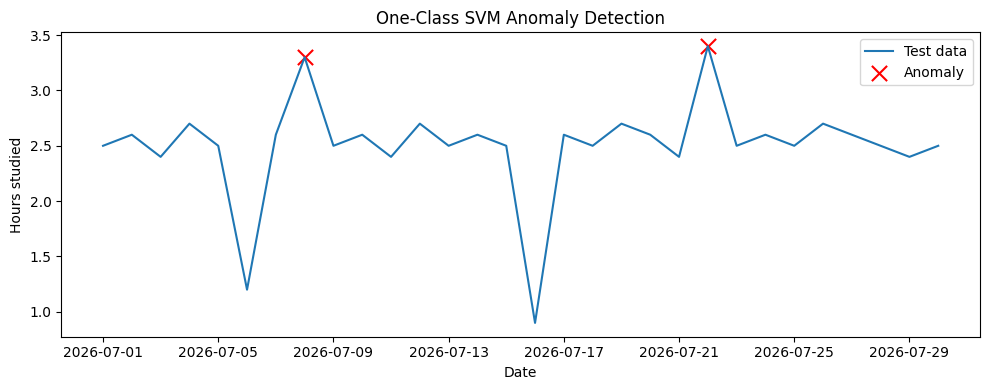

In [4]:
test_df["score"] = model.decision_function(test_df[["hours"]])
test_df["anomaly"] = model.predict(test_df[["hours"]]) == -1
print(test_df[["date", "hours", "score", "anomaly"]])
plt.figure(figsize=(10, 4))
plt.plot(test_df["date"], test_df["hours"], label="Test data")
plt.scatter(
    test_df.loc[test_df["anomaly"], "date"],
    test_df.loc[test_df["anomaly"], "hours"],
    s=120, marker="x", color="red", label="Anomaly"
)
plt.xlabel("Date")
plt.ylabel("Hours studied")
plt.title("One-Class SVM Anomaly Detection")
plt.legend()
plt.tight_layout()
plt.show()